In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [58]:
df= pd.read_excel(r"C:\Users\THEBEST\Desktop\Jupyter_workbook\test 8\House_Rent_Train.xlsx")
df


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [60]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [61]:
missing_localities = df[df['locality'].isnull()]
df['locality'].fillna('Unknown', inplace=True)
missing_after_fill = df[df['locality'].isnull()]
print(df.head())

                                 id  type       locality      activation_date  \
0  ff8081815733a243015733b2876600a6  BHK2        Unknown     21-04-2018 14:44   
1  ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur  2017-09-10 12:48:00   
2  ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur  2018-12-06 22:02:00   
3  ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe     20-07-2018 16:22   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli     31-05-2018 17:41   

    latitude  longitude lease_type  gym  lift  swimming_pool  negotiable  \
0  12.934471  77.634471     FAMILY    1     1              1           0   
1  12.929557  77.672280     ANYONE    0     1              0           1   
2  12.982870  80.262012     FAMILY    0     1              0           0   
3  12.955991  77.531634     FAMILY    0     0              0           1   
4  12.963903  77.649446     FAMILY    0     0              0           1   

       furnishing      parking  property_size  property_

In [62]:
categorical_columns = ['type', 'locality', 'latitude','longitude','lease_type', 'facing', 'water_supply', 'building_type', 'amenities']

# Drop rows with null values in categorical columns
df.dropna(subset=categorical_columns, inplace=True)

In [63]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [64]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,Unknown,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [65]:
# Assuming df is your DataFrame

# Convert 'activation_date' to datetime format
df['activation_date'] = pd.to_datetime(df['activation_date'])

# Extract date, month, and year
df['year'] = df['activation_date'].dt.year
df['month'] = df['activation_date'].dt.month
df['day'] = df['activation_date'].dt.day

# Extract time in minutes
df['time in mints'] = df['activation_date'].dt.hour * 60 + df['activation_date'].dt.minute

# Display the DataFrame to verify the changes
print(df.head())

                                 id  type       locality     activation_date  \
0  ff8081815733a243015733b2876600a6  BHK2        Unknown 2018-04-21 14:44:00   
1  ff8081815ee25e15015ee50004da2acd  BHK2      Bellandur 2017-09-10 12:48:00   
2  ff80818163f29c9e0163f46770b873e7  BHK3  Thiruvanmiyur 2018-12-06 22:02:00   
3  ff80818164b68a700164b74b1b247a1d  BHK1      Attiguppe 2018-07-20 16:22:00   
4  ff80818163b1faf00163b4b9b8a163b1  BHK3      Kodihalli 2018-05-31 17:41:00   

    latitude  longitude lease_type  gym  lift  swimming_pool  negotiable  \
0  12.934471  77.634471     FAMILY    1     1              1           0   
1  12.929557  77.672280     ANYONE    0     1              0           1   
2  12.982870  80.262012     FAMILY    0     1              0           0   
3  12.955991  77.531634     FAMILY    0     0              0           1   
4  12.963903  77.649446     FAMILY    0     0              0           1   

       furnishing      parking  property_size  property_age  b

In [66]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,year,month,day,time in mints
0,ff8081815733a243015733b2876600a6,BHK2,Unknown,2018-04-21 14:44:00,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0,2018,4,21,884
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,2017,9,10,768
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,2018,12,6,1322
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,2018,7,20,982
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,2018,5,31,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0,2017,11,10,1028
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,2017-10-19 20:31:00,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0,2017,10,19,1231
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,2017-12-21 21:18:00,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0,2017,12,21,1278
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,2018-06-28 21:58:00,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0,2018,6,28,1318


In [67]:
df.drop(['activation_date'], axis=1, inplace=True)


In [68]:
df.drop(['id'], axis=1, inplace=True)


In [69]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent,year,month,day,time in mints
0,BHK2,Unknown,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0,2018,4,21,884
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0,2017,9,10,768
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0,2018,12,6,1322
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0,2018,7,20,982
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0,2018,5,31,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,TWO_WHEELER,850,30.0,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0,2017,11,10,1028
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10.0,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0,2017,10,19,1231
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0.0,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0,2017,12,21,1278
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5.0,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0,2018,6,28,1318


In [70]:
df['amenities'].head(5)

0    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
1    {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2    {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
Name: amenities, dtype: object

In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 0 to 20531
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20514 non-null  object 
 1   locality       20514 non-null  object 
 2   latitude       20514 non-null  float64
 3   longitude      20514 non-null  float64
 4   lease_type     20514 non-null  object 
 5   gym            20514 non-null  int64  
 6   lift           20514 non-null  int64  
 7   swimming_pool  20514 non-null  int64  
 8   negotiable     20514 non-null  int64  
 9   furnishing     20514 non-null  object 
 10  parking        20514 non-null  object 
 11  property_size  20514 non-null  int64  
 12  property_age   20514 non-null  float64
 13  bathroom       20514 non-null  float64
 14  facing         20514 non-null  object 
 15  cup_board      20514 non-null  float64
 16  floor          20514 non-null  float64
 17  total_floor    20514 non-null  float64
 18  amenit

In [72]:
import json

# Assuming df is your DataFrame

# Convert the string in 'amenities' column to a dictionary
df['amenities'] = df['amenities'].apply(lambda x: json.loads(x.replace("'", "\"")))

# Create a new column 'INTERNET' with the value from the 'INTERNET' key
df['INTERNET'] = df['amenities'].apply(lambda x: x.get('INTERNET', None))

# Display the DataFrame to verify the changes
print(df.head())

   type       locality   latitude  longitude lease_type  gym  lift  \
0  BHK2        Unknown  12.934471  77.634471     FAMILY    1     1   
1  BHK2      Bellandur  12.929557  77.672280     ANYONE    0     1   
2  BHK3  Thiruvanmiyur  12.982870  80.262012     FAMILY    0     1   
3  BHK1      Attiguppe  12.955991  77.531634     FAMILY    0     0   
4  BHK3      Kodihalli  12.963903  77.649446     FAMILY    0     0   

   swimming_pool  negotiable      furnishing      parking  property_size  \
0              1           0  SEMI_FURNISHED         BOTH           1250   
1              0           1  SEMI_FURNISHED         BOTH           1400   
2              0           0  SEMI_FURNISHED         BOTH           1350   
3              0           1  SEMI_FURNISHED  TWO_WHEELER            600   
4              0           1  SEMI_FURNISHED         BOTH           1500   

   property_age  bathroom facing  cup_board  floor  total_floor  \
0          25.0       2.0      E        2.0    6.0     

In [73]:
df.drop(['amenities'], axis=1, inplace=True)

In [74]:
df.head(5)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET
0,BHK2,Unknown,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,CORP_BORE,AP,2.0,40000.0,2018,4,21,884,True
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,2017,9,10,768,False
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,2018,12,6,1322,False
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,2018,7,20,982,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,2018,5,31,1061,False


In [75]:
pd.set_option('display.max_columns', None)

In [76]:
# Assuming df is your DataFrame

# List of columns for which you want to find unique values
columns_to_check = ['lease_type', 'furnishing', 'water_supply', 'INTERNET', 'parking', 'facing', 'building_type']

# Display unique values for each specified column
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for lease_type: ['FAMILY' 'ANYONE' 'BACHELOR' 'COMPANY']
Unique values for furnishing: ['SEMI_FURNISHED' 'FULLY_FURNISHED' 'NOT_FURNISHED']
Unique values for water_supply: ['CORP_BORE' 'CORPORATION' 'BOREWELL']
Unique values for INTERNET: [ True False]
Unique values for parking: ['BOTH' 'TWO_WHEELER' 'NONE' 'FOUR_WHEELER']
Unique values for facing: ['E' 'NE' 'S' 'N' 'SE' 'W' 'NW' 'SW']
Unique values for building_type: ['AP' 'IH' 'IF' 'GC']


In [77]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# List of categorical columns to encode
categorical_columns = ['lease_type', 'furnishing', 'water_supply', 'INTERNET', 'parking', 'facing', 'building_type']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with encoded columns
print(df.head())

   type       locality   latitude  longitude  lease_type  gym  lift  \
0  BHK2        Unknown  12.934471  77.634471           3    1     1   
1  BHK2      Bellandur  12.929557  77.672280           0    0     1   
2  BHK3  Thiruvanmiyur  12.982870  80.262012           3    0     1   
3  BHK1      Attiguppe  12.955991  77.531634           3    0     0   
4  BHK3      Kodihalli  12.963903  77.649446           3    0     0   

   swimming_pool  negotiable  furnishing  parking  property_size  \
0              1           0           2        0           1250   
1              0           1           2        0           1400   
2              0           0           2        0           1350   
3              0           1           2        3            600   
4              0           1           2        0           1500   

   property_age  bathroom  facing  cup_board  floor  total_floor  \
0          25.0       2.0       0        2.0    6.0         12.0   
1           4.0       2.0   

In [78]:
df['locality'].unique()

array(['Unknown', 'Bellandur', 'Thiruvanmiyur', ...,
       'Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield',
       'Koramangala 4th block',
       'Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India'],
      dtype=object)

In [79]:
df['locality'].value_counts()

Whitefield                                                                                        900
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Bellandur                                                                                         433
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                                    

In [80]:
import pandas as pd

# Assuming df is your DataFrame

# Identify the top 10 contributing localities
top_localities = df['locality'].value_counts().nlargest(10).index

# Create a new column 'locality_encoded' with 'Others' for non-top localities
df['locality_encoded'] = df['locality'].where(df['locality'].isin(top_localities), 'Others')

# Perform one-hot encoding for 'locality_encoded'
df_encoded = pd.get_dummies(df['locality_encoded'], prefix='locality', drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'locality' and 'locality_encoded' columns
df.drop(['locality', 'locality_encoded'], axis=1, inplace=True)

# Display the DataFrame with encoded columns
print(df.head())

   type   latitude  longitude  lease_type  gym  lift  swimming_pool  \
0  BHK2  12.934471  77.634471           3    1     1              1   
1  BHK2  12.929557  77.672280           0    0     1              0   
2  BHK3  12.982870  80.262012           3    0     1              0   
3  BHK1  12.955991  77.531634           3    0     0              0   
4  BHK3  12.963903  77.649446           3    0     0              0   

   negotiable  furnishing  parking  property_size  property_age  bathroom  \
0           0           2        0           1250          25.0       2.0   
1           1           2        0           1400           4.0       2.0   
2           0           2        0           1350           6.0       3.0   
3           1           2        3            600           3.0       1.0   
4           1           2        0           1500          15.0       3.0   

   facing  cup_board  floor  total_floor  water_supply  building_type  \
0       0        2.0    6.0         1

In [81]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,BHK2,12.934471,77.634471,3,1,1,1,0,2,0,1250,25.0,2.0,0,2.0,6.0,12.0,2,0,2.0,40000.0,2018,4,21,884,1,0,0,0,0,0,0,0,1,0,0
1,BHK2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,BHK3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,BHK1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,BHK3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20528,BHK2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20529,BHK2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20530,BHK2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


In [83]:
df['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [84]:
df['type'] = label_encoder.fit_transform(df['type'])

In [85]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.934471,77.634471,3,1,1,1,0,2,0,1250,25.0,2.0,0,2.0,6.0,12.0,2,0,2.0,40000.0,2018,4,21,884,1,0,0,0,0,0,0,0,1,0,0
1,2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20528,2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20529,2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20530,2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


In [86]:
df.to_csv('Property.csv', index=False)

In [87]:
df= pd.read_csv(r"C:\Users\THEBEST\Desktop\Jupyter_workbook\test 8\Property.csv")
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.934471,77.634471,3,1,1,1,0,2,0,1250,25.0,2.0,0,2.0,6.0,12.0,2,0,2.0,40000.0,2018,4,21,884,1,0,0,0,0,0,0,0,1,0,0
1,2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20509,1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20510,2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20511,2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20512,2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


In [88]:
pd.set_option('display.max_columns', None)
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.934471,77.634471,3,1,1,1,0,2,0,1250,25.0,2.0,0,2.0,6.0,12.0,2,0,2.0,40000.0,2018,4,21,884,1,0,0,0,0,0,0,0,1,0,0
1,2,12.929557,77.672280,0,0,1,0,1,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,3,12.982870,80.262012,3,0,1,0,0,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,1,12.955991,77.531634,3,0,0,0,1,2,3,600,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,3,12.963903,77.649446,3,0,0,0,1,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20509,1,12.979762,77.615395,0,0,1,0,1,2,3,850,30.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20510,2,12.931072,77.632361,0,0,0,0,1,2,0,1000,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20511,2,12.901800,77.566597,3,1,1,0,1,2,0,1000,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20512,2,12.965502,77.647694,3,0,1,0,0,2,0,1000,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


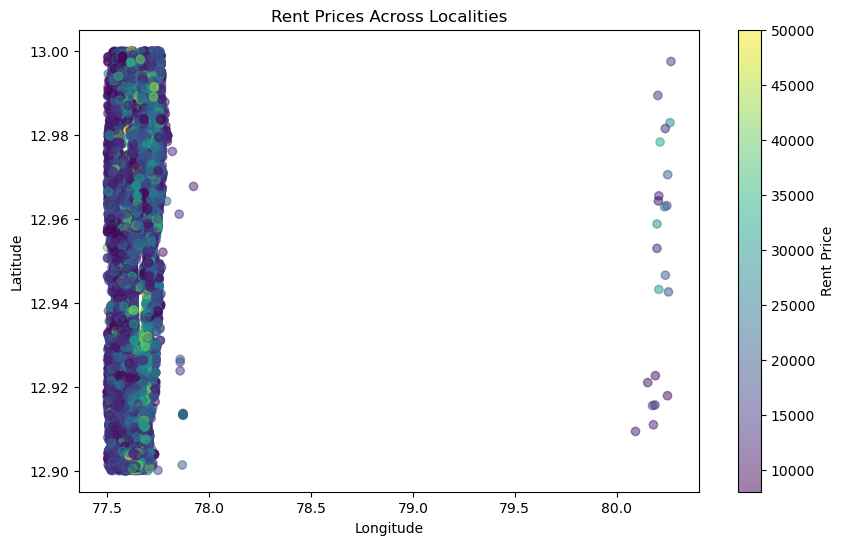

In [89]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['rent'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Rent Price')
plt.title('Rent Prices Across Localities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [90]:
# Assuming df is your DataFrame
rent_latitude_corr = df['rent'].corr(df['latitude'])
rent_longitude_corr = df['rent'].corr(df['longitude'])

print(f'Correlation between Rent and Latitude: {rent_latitude_corr:.2f}')
print(f'Correlation between Rent and Longitude: {rent_longitude_corr:.2f}')

Correlation between Rent and Latitude: 0.03
Correlation between Rent and Longitude: 0.16


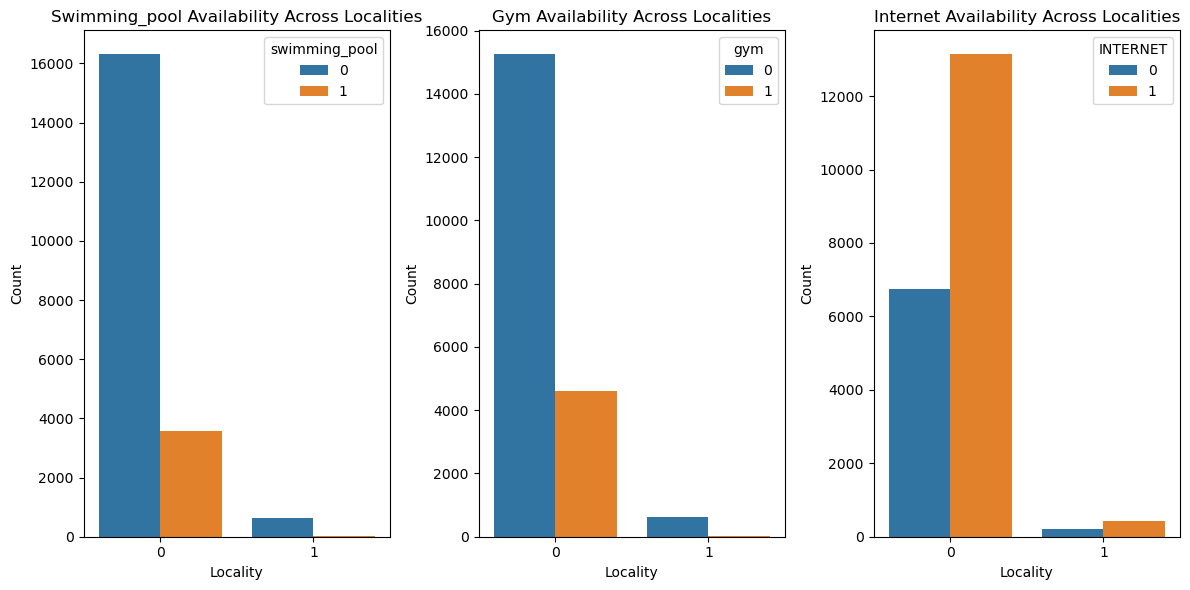

In [91]:
import seaborn as sns

# Assuming df is your DataFrame
amenities = ['swimming_pool', 'gym', 'INTERNET']

plt.figure(figsize=(12, 6))
for amenity in amenities:
    plt.subplot(1, len(amenities), amenities.index(amenity) + 1)
    sns.countplot(x='locality_Banashankari', hue=amenity, data=df)
    plt.title(f'{amenity.capitalize()} Availability Across Localities')
    plt.xlabel('Locality')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

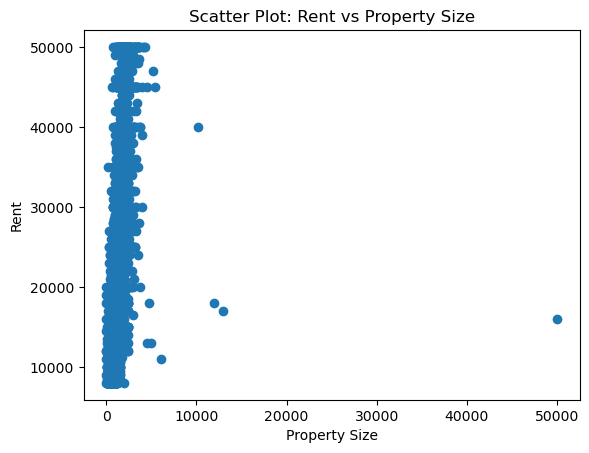

In [99]:
import matplotlib.pyplot as plt

# Example: Scatter plot for 'rent' against 'property_size'
plt.scatter(df['property_size'], df['rent'])
plt.xlabel('Property Size')
plt.ylabel('Rent')
plt.title('Scatter Plot: Rent vs Property Size')
plt.show()

In [100]:
from scipy import stats

# Assuming df is your DataFrame

# Columns to check for outliers
columns_to_check = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                     'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                     'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Calculate Z-scores for specified columns
z_scores = stats.zscore(df[columns_to_check])

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Display rows with outliers
outlier_rows = df[outliers]
print(outlier_rows)

       type   latitude  longitude  lease_type  gym  lift  swimming_pool  \
0         2  12.934471  77.634471           3    1     1              1   
6         3  12.967144  77.750662           0    1     1              1   
11        2  12.986175  77.735956           0    1     1              0   
13        2  12.989002  77.727370           3    1     1              1   
18        2  12.900570  77.707885           3    0     0              0   
...     ...        ...        ...         ...  ...   ...            ...   
20460     2  12.904369  77.602512           0    1     1              1   
20474     2  12.931656  77.697604           0    1     1              0   
20489     1  12.979762  77.615395           0    0     1              0   
20499     1  12.979762  77.615395           0    0     1              0   
20509     1  12.979762  77.615395           0    0     1              0   

       negotiable  furnishing  parking  property_size  property_age  bathroom  \
0               0 

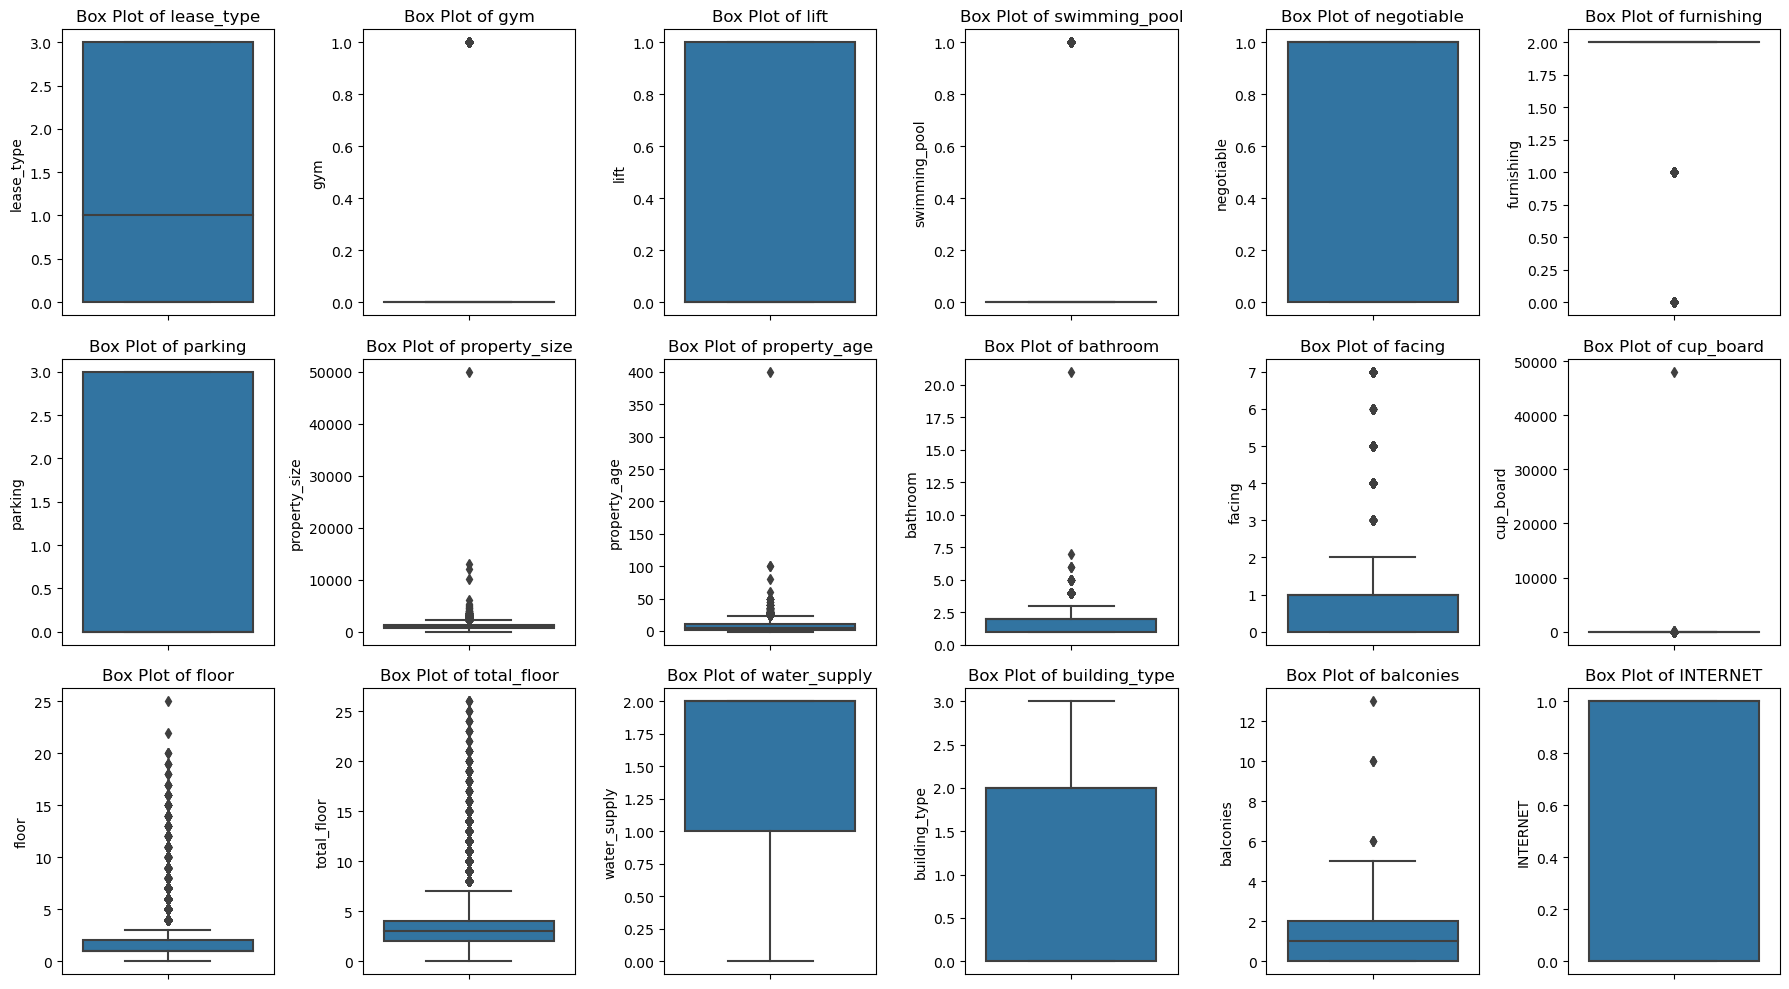

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Columns to visualize
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

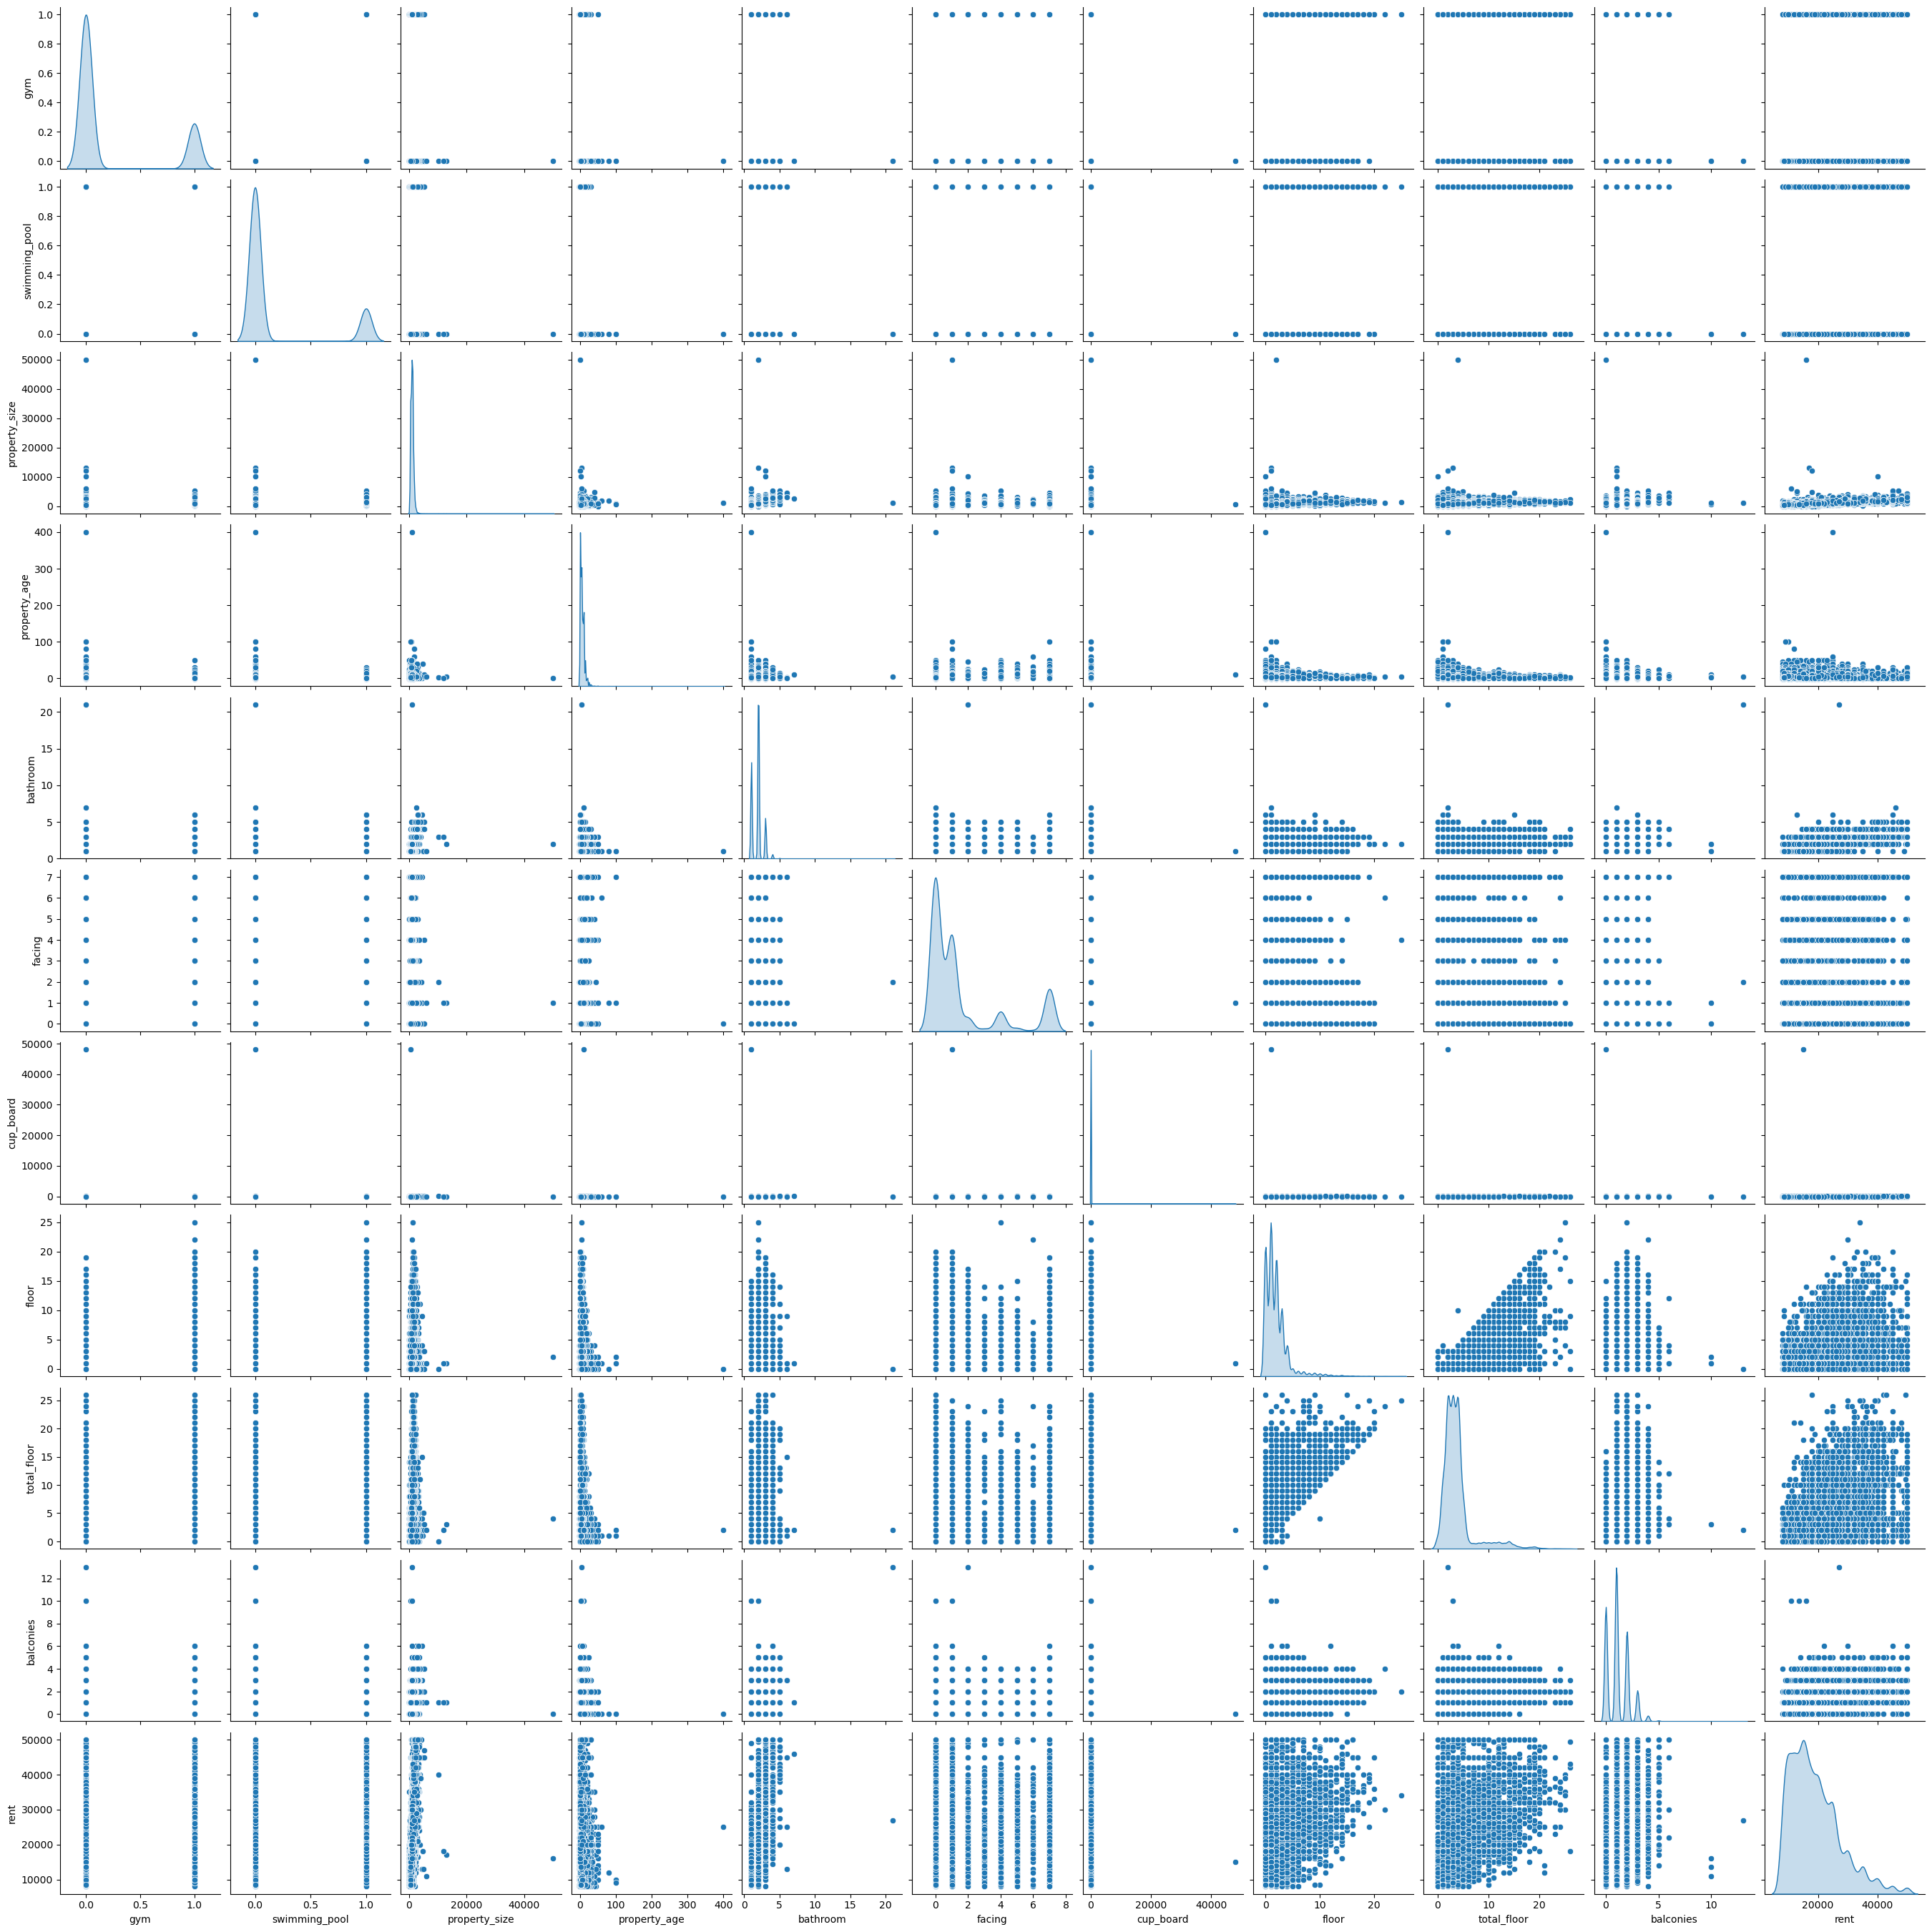

In [105]:
# Assuming df is your DataFrame
sns.pairplot(df, vars=columns_with_outliers + ['rent'], diag_kind='kde')
plt.show()

In [107]:
# Assuming df is your DataFrame
columns_to_cap = ['gym', 'swimming_pool', 'property_size', 'property_age', 'bathroom', 'floor', 'total_floor', 'balconies']

for column in columns_to_cap:
    upper_threshold = df[column].quantile(0.95)
    df[column] = np.where(df[column] > upper_threshold, upper_threshold, df[column])

In [108]:
df

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,year,month,day,time in mints,INTERNET,locality_Banashankari,locality_Bellandur,locality_HSR Layout,locality_JP Nagar,locality_Koramangala,locality_Mahadevapura,locality_Marathahalli,locality_Others,locality_RR Nagar,locality_Whitefield
0,2,12.934471,77.634471,3,1.0,1,1.0,0,2,0,1250.0,15.0,2.0,0,2.0,6.0,12.0,2,0,2.0,40000.0,2018,4,21,884,1,0,0,0,0,0,0,0,1,0,0
1,2,12.929557,77.672280,0,0.0,1,0.0,1,2,0,1400.0,4.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,2017,9,10,768,0,0,1,0,0,0,0,0,0,0,0
2,3,12.982870,80.262012,3,0.0,1,0.0,0,2,0,1350.0,6.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,2018,12,6,1322,0,0,0,0,0,0,0,0,1,0,0
3,1,12.955991,77.531634,3,0.0,0,0.0,1,2,3,600.0,3.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,2018,7,20,982,0,0,0,0,0,0,0,0,1,0,0
4,3,12.963903,77.649446,3,0.0,0,0.0,1,2,0,1500.0,15.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,2018,5,31,1061,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20509,1,12.979762,77.615395,0,0.0,1,0.0,1,2,3,850.0,15.0,2.0,0,1.0,1.0,4.0,2,0,1.0,20000.0,2017,11,10,1028,1,0,0,0,0,0,0,0,1,0,0
20510,2,12.931072,77.632361,0,0.0,0,0.0,1,2,0,1000.0,10.0,2.0,1,2.0,1.0,2.0,1,3,2.0,30000.0,2017,10,19,1231,1,0,0,0,0,0,0,0,1,0,0
20511,2,12.901800,77.566597,3,1.0,1,0.0,1,2,0,1000.0,0.0,2.0,7,2.0,5.0,5.0,0,0,2.0,16000.0,2017,12,21,1278,1,0,0,0,0,0,0,0,1,0,0
20512,2,12.965502,77.647694,3,0.0,1,0.0,0,2,0,1000.0,5.0,2.0,0,2.0,2.0,4.0,2,0,3.0,30000.0,2018,6,28,1318,1,0,0,0,0,0,0,0,1,0,0


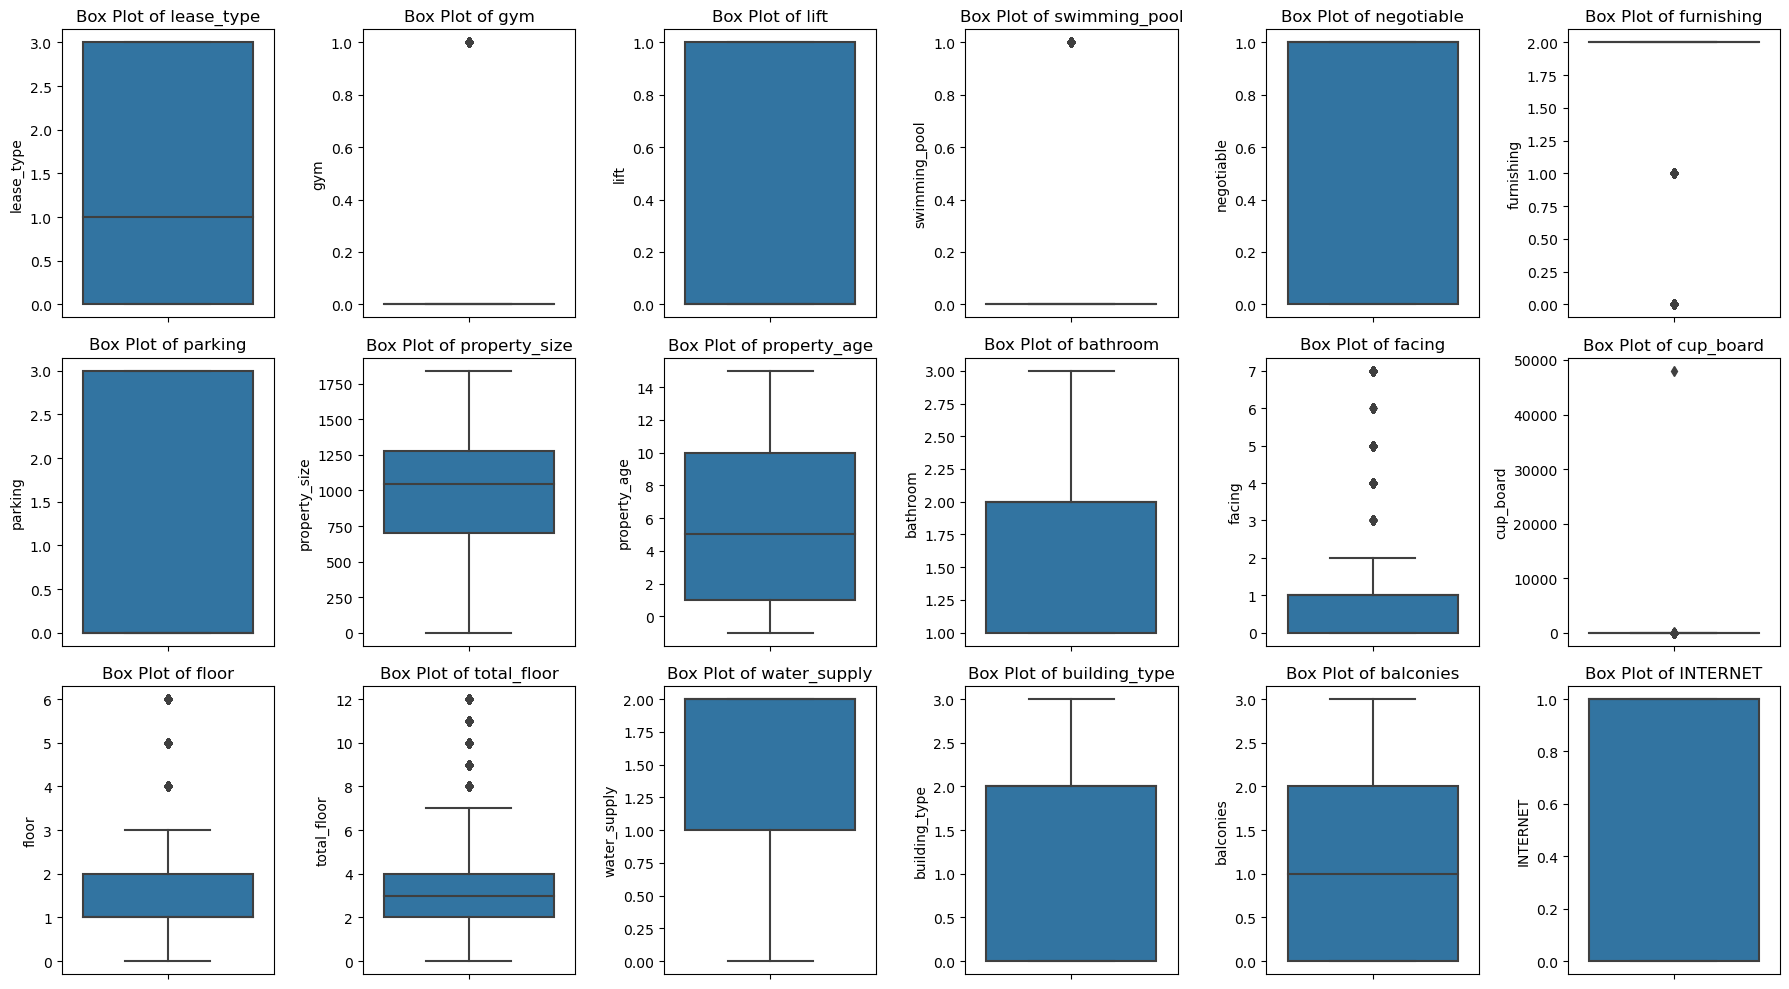

In [109]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [112]:
columns_to_cap = ['gym', 'swimming_pool', 'floor','facing', 'total_floor']

for column in columns_to_cap:
    upper_threshold = df[column].quantile(0.95)
    df[column] = np.where(df[column] > upper_threshold, upper_threshold, df[column])

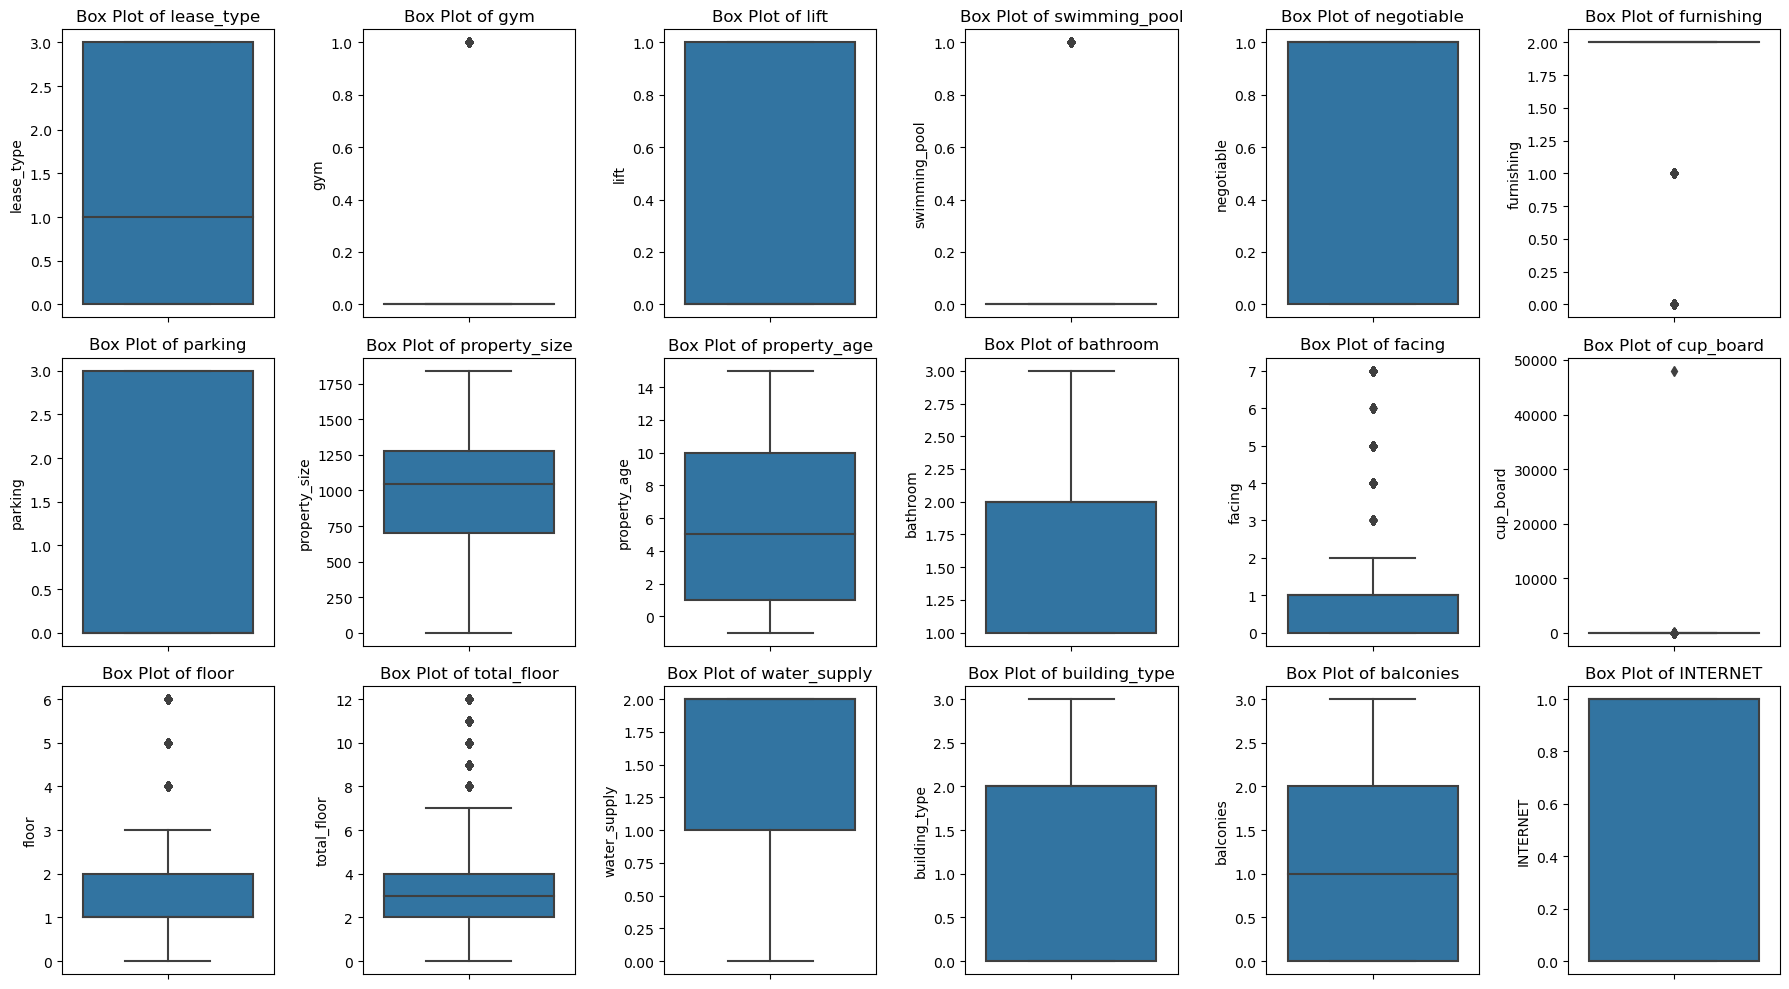

In [113]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

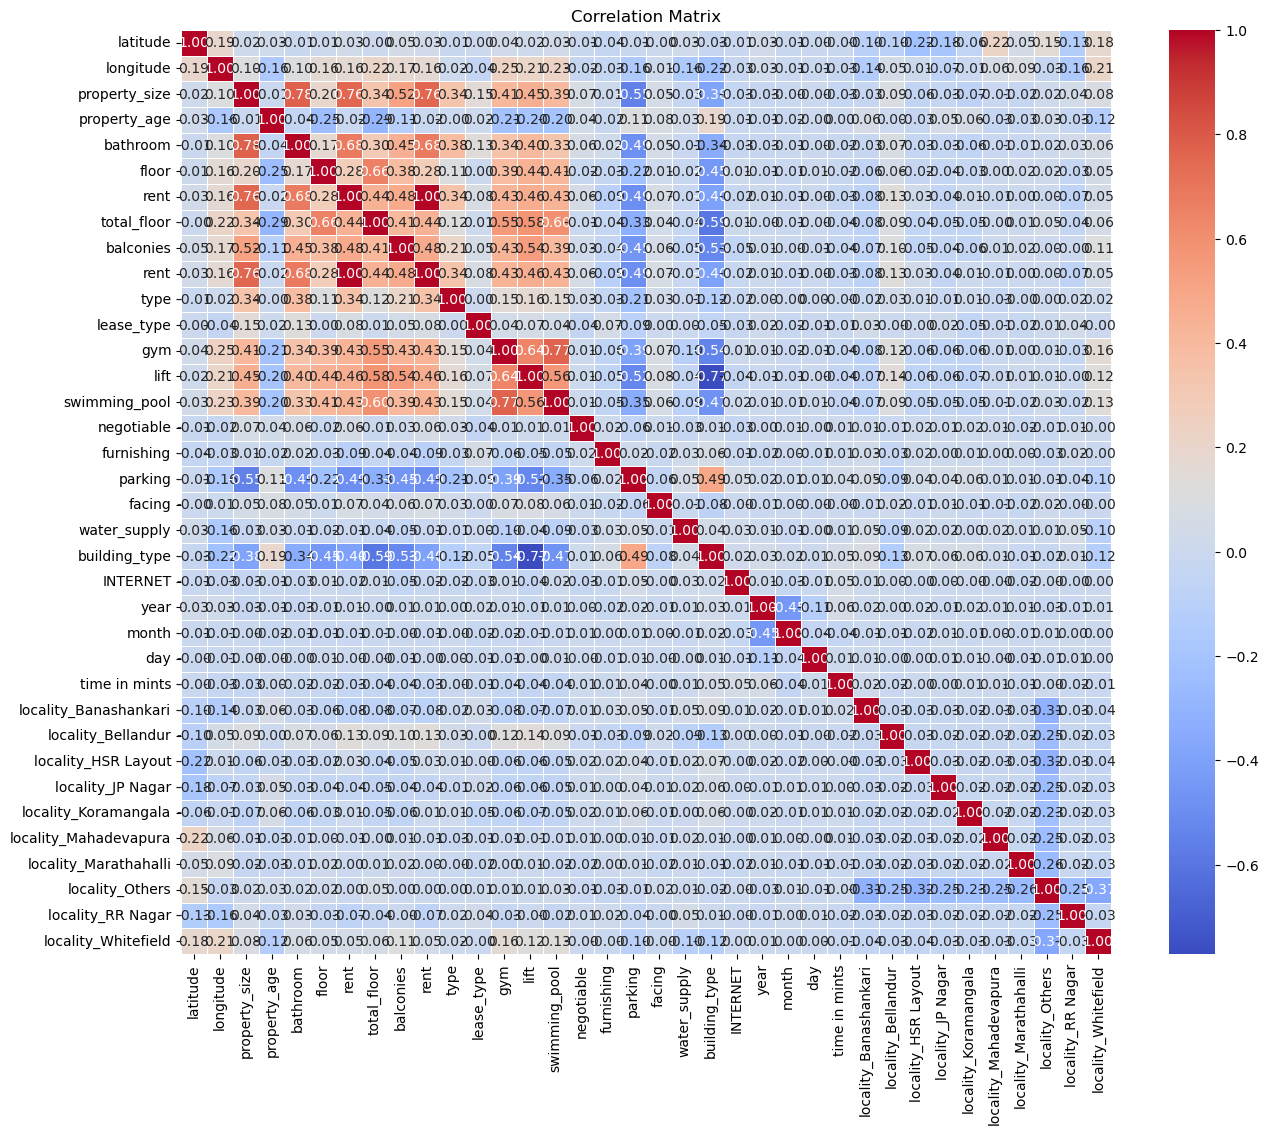

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select relevant columns for correlation analysis
numerical_columns = ['latitude', 'longitude', 'property_size', 'property_age', 'bathroom', 'floor', 'rent','total_floor', 'balconies', 'rent']
categorical_columns = ['type', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type', 'INTERNET']
time_related_columns = ['year', 'month', 'day', 'time in mints']
locality_columns = ['locality_Banashankari', 'locality_Bellandur', 'locality_HSR Layout', 'locality_JP Nagar', 'locality_Koramangala', 'locality_Mahadevapura', 'locality_Marathahalli', 'locality_Others', 'locality_RR Nagar', 'locality_Whitefield']

# Combine selected columns
selected_columns = numerical_columns + categorical_columns + time_related_columns + locality_columns

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Assuming df is your DataFrame
columns_to_log_transform = ['facing', 'total_floor', 'floor']

for column in columns_to_log_transform:
    df[column] = np.log1p(df[column])

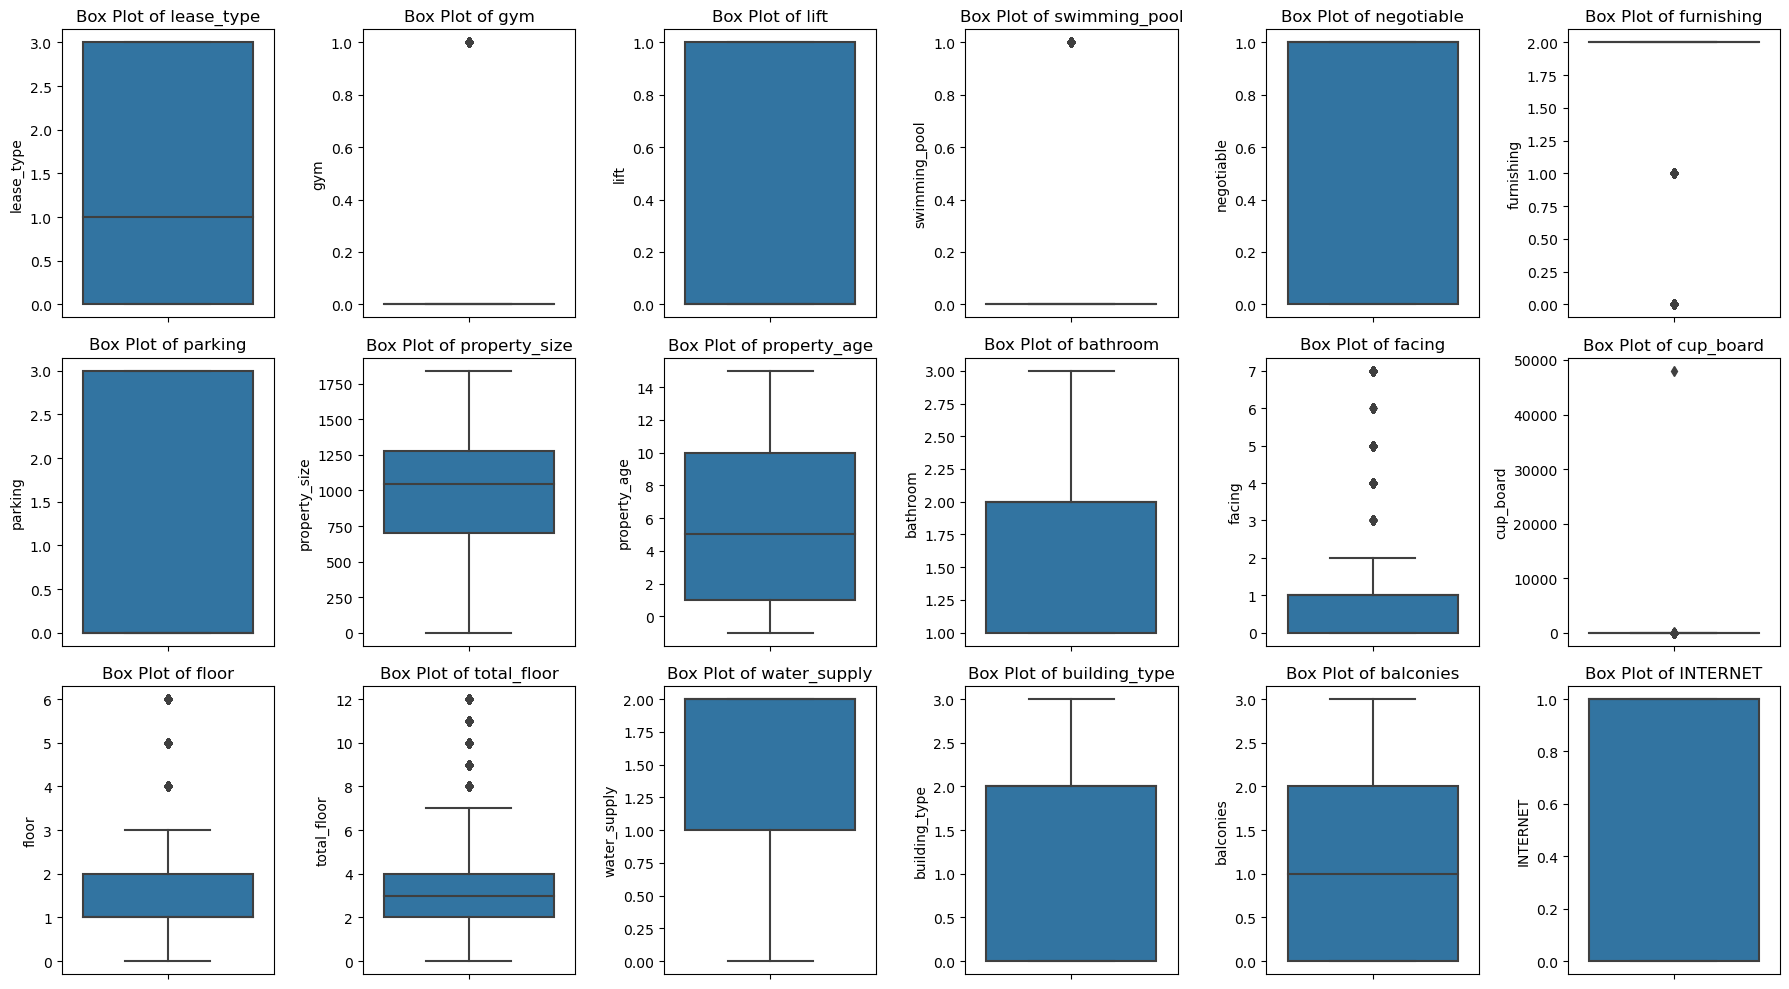

In [115]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [117]:
Q1 = df['furnishing'].quantile(0.25)
Q3 = df['furnishing'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [118]:
threshold = lower_bound  # You can choose a different threshold
df['furnishing'] = np.where(df['furnishing'] > upper_bound, threshold, df['furnishing'])

In [119]:
Q1 = df['total_floor'].quantile(0.25)
Q3 = df['total_floor'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [120]:
threshold = upper_bound  # You can choose a different threshold
df['total_floor'] = np.where(df['total_floor'] > upper_bound, threshold, df['total_floor'])

In [121]:
Q1 = df['facing'].quantile(0.25)
Q3 = df['facing'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [122]:
threshold = upper_bound  # You can choose a different threshold
df['facing'] = np.where(df['facing'] > upper_bound, threshold, df['facing'])

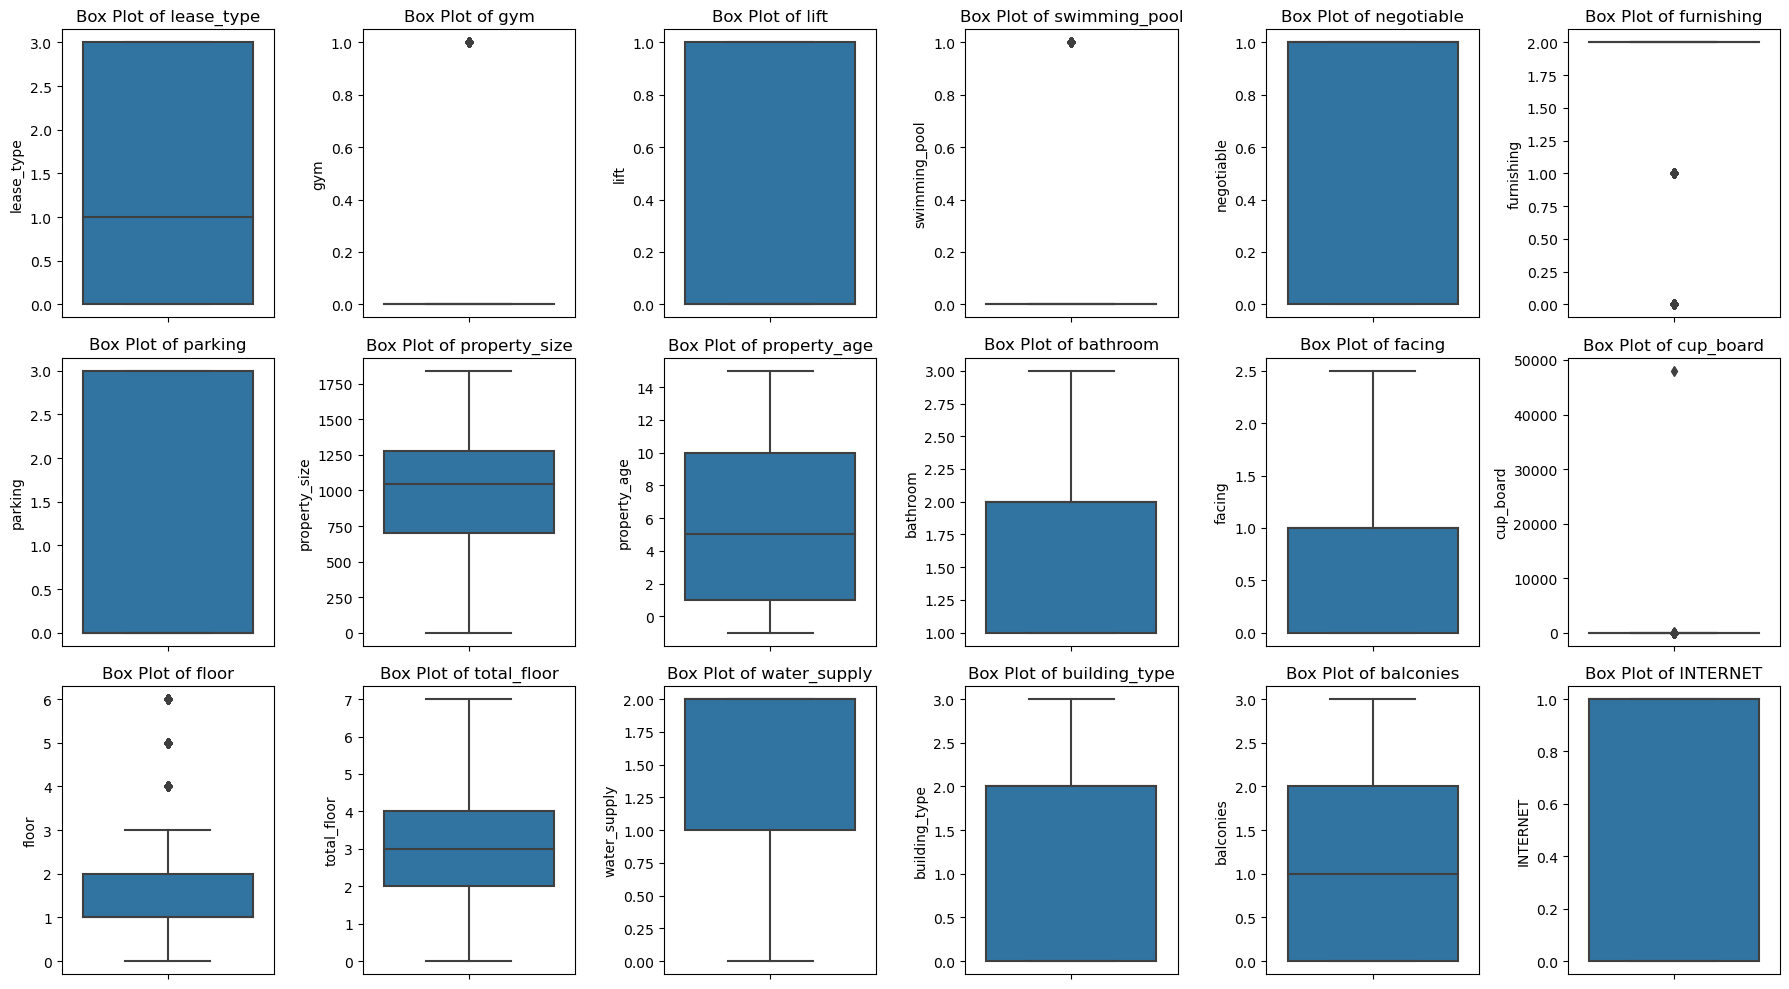

In [123]:
columns_to_visualize = ['lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing',
                         'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
                         'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'INTERNET']

# Create box plots for specified columns
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

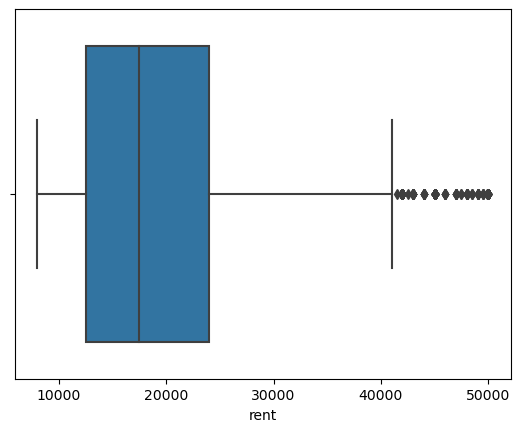

In [124]:
sns.boxplot(x=df['rent'])
plt.show()

In [125]:
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
threshold = upper_bound  # You can choose a different threshold
df['rent'] = np.where(df['rent'] > upper_bound, threshold, df['rent'])

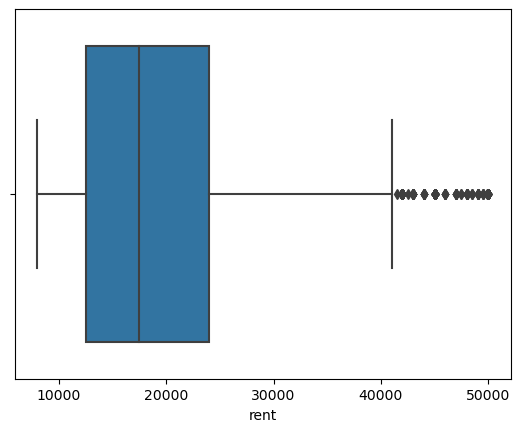

In [126]:
sns.boxplot(x=df['rent'])
plt.show()

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame with features and target variable
# X should contain the selected features, and y should contain the target variable ('rent')

# Select features and target variable
features = ['lease_type',  'lift',  'negotiable', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'year', 'month', 'day', 'time in mints', 'INTERNET']
target = 'rent'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print predicted rent values along with actual rent values
result_df = pd.DataFrame({'Actual Rent': y_test, 'Predicted Rent': y_pred})
print(result_df)


r2 = r2_score(y_test, y_pred)


print(f'R-squared Score: {r2}')

       Actual Rent  Predicted Rent
18808      19000.0    25157.216211
12897      15000.0    10321.515163
6077       20000.0    19129.738346
1604       12000.0    10385.568659
19923      15000.0    17483.888623
...            ...             ...
9655       24000.0    16866.239115
8968       22000.0    17646.053520
6186       25000.0    22338.831205
16056      13000.0    12095.818666
6549       19000.0    24238.029401

[4103 rows x 2 columns]
R-squared Score: 0.630438130039666


In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

# Assuming df is your DataFrame with features and target variable
# X should contain the selected features, and y should contain the target variable ('rent')

# Select features and target variable
features = ['lease_type',  'lift',  'negotiable', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board', 'floor', 'total_floor', 'water_supply', 'building_type', 'balconies', 'year', 'month', 'day', 'time in mints', 'INTERNET']
target = 'rent'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print predicted rent values along with actual rent values
result_df = pd.DataFrame({'Actual Rent': y_test, 'Predicted Rent': y_pred})
print(result_df)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

# Save the trained model to a pickle file
joblib.dump(model, 'random_forest_model.pkl')

       Actual Rent  Predicted Rent
18808      19000.0         22435.0
12897      15000.0         12270.0
6077       20000.0         18785.0
1604       12000.0         11797.0
19923      15000.0         15736.0
...            ...             ...
9655       24000.0         15861.0
8968       22000.0         19300.5
6186       25000.0         20755.0
16056      13000.0         12840.0
6549       19000.0         22679.0

[4103 rows x 2 columns]
R-squared Score: 0.6586176960499623


['random_forest_model.pkl']